# Stage 1: Exploratory Data Analysis (EDA)

=== STAGE 1: EXPLORATORY DATA ANALYSIS ===
1.1 DATASET OVERVIEW
Shape: (200, 31)
Missing values:
participant_id                            0
age                                       0
gender                                    0
bmi                                       0
diabetes_status                           0
hba1c                                     0
meal_timing_strategy                      0
chronotype                                0
medications                               0
time_in_range_percent                     0
time_above_range_percent                  0
time_below_range_percent                  0
mean_glucose_mg_dl                        0
glucose_cv_percent                        0
glucose_sd                                0
mage                                      0
morning_fasting_glucose                  25
postprandial_mean_glucose                 0
postprandial_max_glucose                  0
actual_eating_window_hours                0
followup_hba1c         

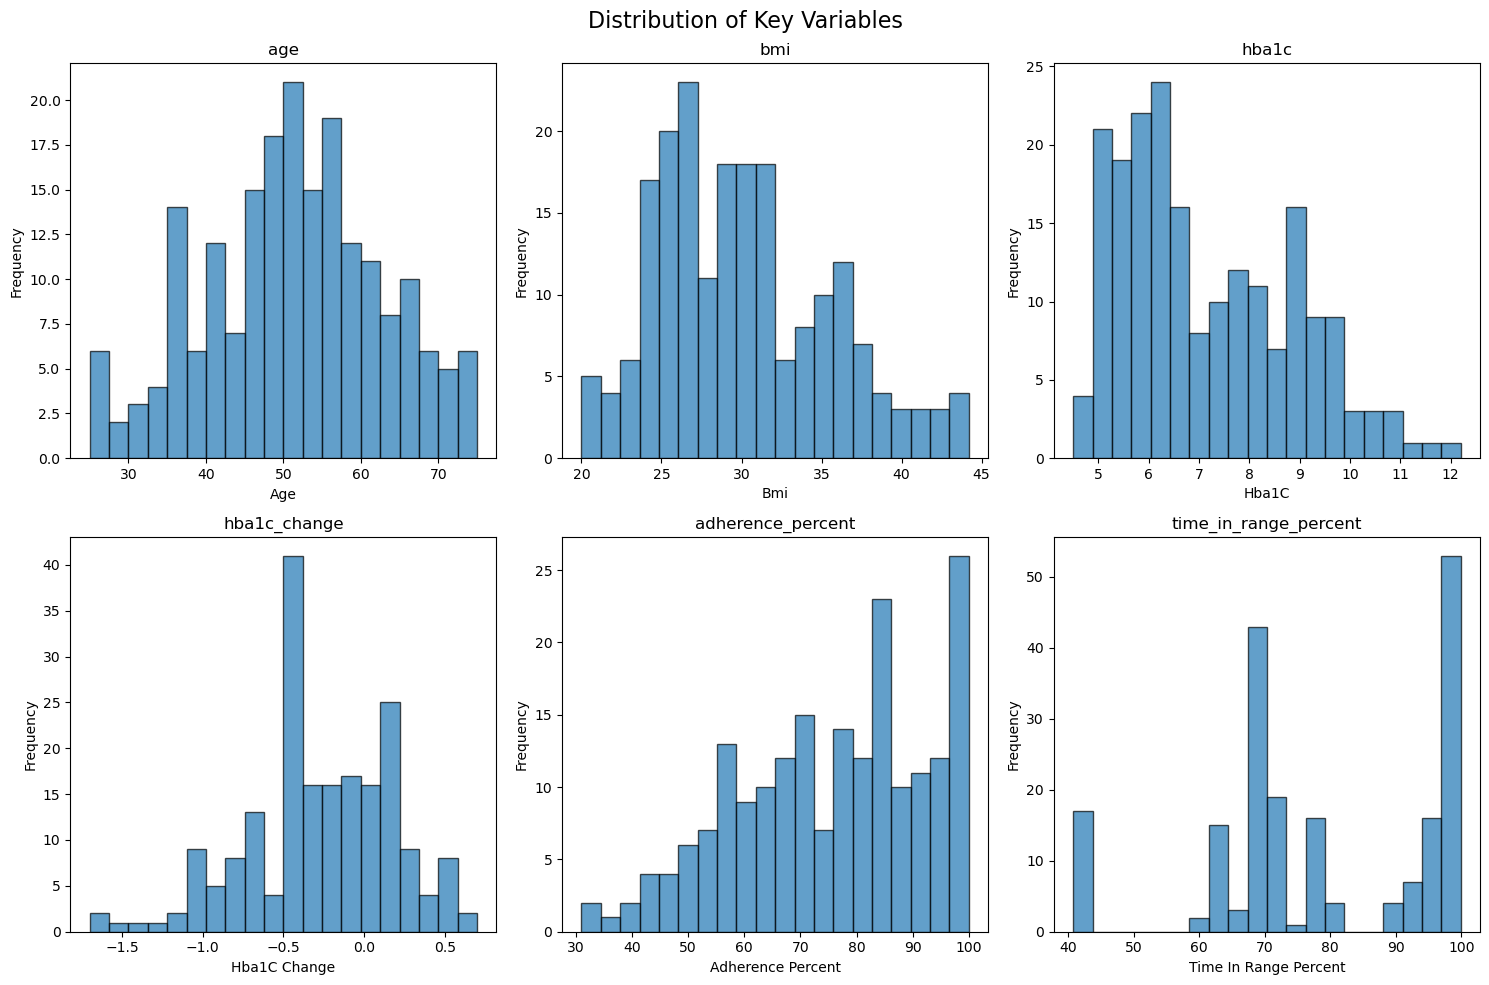

Stage 1 Complete: EDA finished


In [1]:
# STAGE 1: EXPLORATORY DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('comprehensive_meal_timing_study_data.csv')

print("=== STAGE 1: EXPLORATORY DATA ANALYSIS ===")

# 1.1 Dataset Overview
print("1.1 DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")

# 1.2 Basic Statistics
print("\n1.2 DESCRIPTIVE STATISTICS")
print(df.describe().round(2))

# 1.3 Categorical Variables Distribution
print("\n1.3 CATEGORICAL VARIABLES")
categorical_vars = ['gender', 'diabetes_status', 'meal_timing_strategy', 'chronotype']
for var in categorical_vars:
    print(f"\n{var}:")
    print(df[var].value_counts())
    print(f"Proportions: {df[var].value_counts(normalize=True).round(3)}")

# 1.4 Data Quality Checks
print("\n1.4 DATA QUALITY CHECKS")
# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

numerical_vars = ['age', 'bmi', 'hba1c', 'hba1c_change', 'adherence_percent']
for var in numerical_vars:
    outlier_count = detect_outliers(df, var)
    print(f"{var}: {outlier_count} outliers ({outlier_count/len(df)*100:.1f}%)")

# 1.5 Distribution Visualizations
print("\n1.5 Creating distribution plots...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16)

# Plot distributions
vars_to_plot = ['age', 'bmi', 'hba1c', 'hba1c_change', 'adherence_percent', 'time_in_range_percent']
for i, var in enumerate(vars_to_plot):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df[var], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_xlabel(var.replace('_', ' ').title())
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Stage 1 Complete: EDA finished")

# Stage 2: Descriptive Statistics & Group Comparisons

In [2]:
# STAGE 2: DESCRIPTIVE STATISTICS & GROUP COMPARISONS
print("\n=== STAGE 2: DESCRIPTIVE STATISTICS & GROUP COMPARISONS ===")

# 2.1 Baseline Characteristics by Meal Timing Strategy
print("2.1 BASELINE CHARACTERISTICS BY STRATEGY")
baseline_vars = ['age', 'bmi', 'hba1c', 'time_in_range_percent', 'mean_glucose_mg_dl']

baseline_table = df.groupby('meal_timing_strategy')[baseline_vars].agg(['mean', 'std', 'count']).round(2)
print(baseline_table)

# 2.2 Strategy Distribution by Diabetes Status
print("\n2.2 STRATEGY DISTRIBUTION BY DIABETES STATUS")
crosstab = pd.crosstab(df['diabetes_status'], df['meal_timing_strategy'])
print("Counts:")
print(crosstab)
print("\nProportions:")
print(pd.crosstab(df['diabetes_status'], df['meal_timing_strategy'], normalize='index').round(3))

# 2.3 Gender and Chronotype Distribution
print("\n2.3 GENDER AND CHRONOTYPE BY STRATEGY")
gender_dist = pd.crosstab(df['meal_timing_strategy'], df['gender'], normalize='index').round(3)
print("Gender distribution by strategy:")
print(gender_dist)

chronotype_dist = pd.crosstab(df['meal_timing_strategy'], df['chronotype'], normalize='index').round(3)
print("\nChronotype distribution by strategy:")
print(chronotype_dist)

# 2.4 Statistical Tests for Baseline Balance
print("\n2.4 BASELINE BALANCE TESTING")
from scipy.stats import f_oneway, chi2_contingency

# Test continuous variables
for var in baseline_vars:
    groups = [df[df['meal_timing_strategy'] == strategy][var].values 
              for strategy in df['meal_timing_strategy'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"{var}: F={f_stat:.3f}, p={p_value:.3f}")

# Test categorical variables
for var in ['gender', 'diabetes_status', 'chronotype']:
    contingency = pd.crosstab(df['meal_timing_strategy'], df[var])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"{var}: χ²={chi2:.3f}, p={p_value:.3f}")

print("Stage 2 Complete: Descriptive analysis finished")


=== STAGE 2: DESCRIPTIVE STATISTICS & GROUP COMPARISONS ===
2.1 BASELINE CHARACTERISTICS BY STRATEGY
                        age                 bmi             hba1c              \
                       mean    std count   mean   std count  mean   std count   
meal_timing_strategy                                                            
control_12h           46.24  11.77    17  33.49  5.10    17  7.38  2.03    17   
early_trf_10h         54.54  10.30    28  29.19  5.72    28  7.32  1.74    28   
early_trf_6h          51.19  11.20    31  30.08  5.43    31  7.23  1.72    31   
early_trf_8h          52.77  12.22    31  29.82  5.69    31  6.81  1.40    31   
irregular             51.88  10.91    25  29.43  5.27    25  7.30  1.64    25   
late_trf_8h           48.32  11.35    31  30.39  5.21    31  7.23  1.96    31   
mid_trf_8h            51.05  11.94    37  29.48  5.03    37  6.85  1.63    37   

                     time_in_range_percent              mean_glucose_mg_dl  \
         

# Stage 3: Primary Efficacy Analysis

In [3]:
# STAGE 3: PRIMARY EFFICACY ANALYSIS
print("\n=== STAGE 3: PRIMARY EFFICACY ANALYSIS ===")

# 3.1 Primary Endpoint: HbA1c Change by Strategy
print("3.1 PRIMARY ENDPOINT ANALYSIS")
primary_results = df.groupby('meal_timing_strategy')['hba1c_change'].agg([
    'count', 'mean', 'std', 'median', 
    lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)
]).round(3)
primary_results.columns = ['n', 'mean', 'std', 'median', 'Q1', 'Q3']
print(primary_results)

# 3.2 Statistical Significance Testing
print("\n3.2 STATISTICAL SIGNIFICANCE TESTING")

# Overall ANOVA
strategies = df['meal_timing_strategy'].unique()
groups = [df[df['meal_timing_strategy'] == strategy]['hba1c_change'].values for strategy in strategies]
f_stat, p_overall = f_oneway(*groups)
print(f"Overall ANOVA: F={f_stat:.3f}, p={p_overall:.3f}")

# 3.3 Post-hoc Pairwise Comparisons
print("\n3.3 PAIRWISE COMPARISONS (vs Control)")
control_group = df[df['meal_timing_strategy'] == 'control_12h']['hba1c_change']

pairwise_results = []
for strategy in strategies:
    if strategy != 'control_12h':
        treatment_group = df[df['meal_timing_strategy'] == strategy]['hba1c_change']
        t_stat, p_value = stats.ttest_ind(treatment_group, control_group)
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(treatment_group)-1)*treatment_group.var() + 
                             (len(control_group)-1)*control_group.var()) / 
                            (len(treatment_group)+len(control_group)-2))
        cohens_d = (treatment_group.mean() - control_group.mean()) / pooled_std
        
        pairwise_results.append({
            'strategy': strategy,
            'n': len(treatment_group),
            'mean_diff': treatment_group.mean() - control_group.mean(),
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d
        })

pairwise_df = pd.DataFrame(pairwise_results)
print(pairwise_df.round(3))

# 3.4 Early TRF vs Others Analysis
print("\n3.4 EARLY TRF vs OTHER STRATEGIES")
df['early_trf'] = df['meal_timing_strategy'].str.contains('early_trf')

early_trf = df[df['early_trf'] == True]['hba1c_change']
other_strategies = df[df['early_trf'] == False]['hba1c_change']

print(f"Early TRF (n={len(early_trf)}): {early_trf.mean():.3f} ± {early_trf.std():.3f}")
print(f"Other strategies (n={len(other_strategies)}): {other_strategies.mean():.3f} ± {other_strategies.std():.3f}")

t_stat, p_value = stats.ttest_ind(early_trf, other_strategies)
pooled_std = np.sqrt(((len(early_trf)-1)*early_trf.var() + 
                     (len(other_strategies)-1)*other_strategies.var()) / 
                    (len(early_trf)+len(other_strategies)-2))
cohens_d = (early_trf.mean() - other_strategies.mean()) / pooled_std

print(f"Difference: {early_trf.mean() - other_strategies.mean():.3f}")
print(f"T-test: t={t_stat:.3f}, p={p_value:.3f}")
print(f"Effect size (Cohen's d): {cohens_d:.3f}")

# 3.5 Confidence Intervals
print("\n3.5 CONFIDENCE INTERVALS (95%)")
for strategy in strategies:
    group_data = df[df['meal_timing_strategy'] == strategy]['hba1c_change']
    mean = group_data.mean()
    sem = stats.sem(group_data)
    ci = stats.t.interval(0.95, len(group_data)-1, loc=mean, scale=sem)
    print(f"{strategy}: {mean:.3f} (95% CI: {ci[0]:.3f} to {ci[1]:.3f})")

print("Stage 3 Complete: Primary efficacy analysis finished")


=== STAGE 3: PRIMARY EFFICACY ANALYSIS ===
3.1 PRIMARY ENDPOINT ANALYSIS
                       n   mean    std  median     Q1   Q3
meal_timing_strategy                                      
control_12h           17 -0.100  0.274     0.0 -0.300  0.1
early_trf_10h         28 -0.375  0.313    -0.3 -0.525 -0.2
early_trf_6h          31 -0.852  0.348    -0.8 -1.000 -0.6
early_trf_8h          31 -0.548  0.317    -0.5 -0.700 -0.3
irregular             25  0.268  0.229     0.3  0.100  0.5
late_trf_8h           31  0.094  0.222     0.1 -0.100  0.2
mid_trf_8h            37 -0.276  0.258    -0.3 -0.400 -0.2

3.2 STATISTICAL SIGNIFICANCE TESTING
Overall ANOVA: F=51.453, p=0.000

3.3 PAIRWISE COMPARISONS (vs Control)
        strategy   n  mean_diff  t_stat  p_value  cohens_d
0  early_trf_10h  28     -0.275  -2.988    0.005    -0.919
1     mid_trf_8h  37     -0.176  -2.282    0.027    -0.669
2      irregular  25      0.368   4.726    0.000     1.486
3   early_trf_8h  31     -0.448  -4.907    0.000 

# Stage 4: Secondary Outcome Analysis

In [4]:
# STAGE 4: SECONDARY OUTCOME ANALYSIS
print("\n=== STAGE 4: SECONDARY OUTCOME ANALYSIS ===")

# 4.1 Multiple Secondary Endpoints
secondary_outcomes = ['weight_change_percent', 'time_in_range_percent', 
                     'adherence_percent', 'energy_level_score', 'sleep_quality_score']

print("4.1 SECONDARY OUTCOMES BY STRATEGY")
secondary_table = df.groupby('meal_timing_strategy')[secondary_outcomes].agg(['mean', 'std']).round(2)
print(secondary_table)

# 4.2 Statistical Testing for Secondary Outcomes
print("\n4.2 STATISTICAL TESTING FOR SECONDARY OUTCOMES")
for outcome in secondary_outcomes:
    groups = [df[df['meal_timing_strategy'] == strategy][outcome].values 
              for strategy in strategies]
    f_stat, p_value = f_oneway(*groups)
    print(f"{outcome}: F={f_stat:.3f}, p={p_value:.3f}")

# 4.3 Glucose Metrics Analysis
print("\n4.3 GLUCOSE METRICS ANALYSIS")
glucose_metrics = ['mean_glucose_mg_dl', 'morning_fasting_glucose', 
                  'postprandial_mean_glucose', 'glucose_cv_percent']

glucose_table = df.groupby('meal_timing_strategy')[glucose_metrics].agg(['mean', 'std']).round(1)
print(glucose_table)

# 4.4 Correlation Between Primary and Secondary Outcomes
print("\n4.4 CORRELATIONS WITH PRIMARY OUTCOME")
correlations = df[secondary_outcomes + ['hba1c_change']].corr()['hba1c_change'].drop('hba1c_change')
print("Correlations with HbA1c change:")
for outcome, corr in correlations.items():
    r, p_value = stats.pearsonr(df[outcome], df['hba1c_change'])
    print(f"{outcome}: r={r:.3f}, p={p_value:.3f}")

# 4.5 Composite Outcome Analysis
print("\n4.5 COMPOSITE OUTCOME ANALYSIS")
# Create composite success score
df['composite_success'] = (
    (df['hba1c_change'] <= -0.5).astype(int) +  # Meaningful HbA1c reduction
    (df['weight_change_percent'] <= -3.0).astype(int) +  # Meaningful weight loss
    (df['adherence_percent'] >= 75).astype(int)  # Good adherence
)

composite_results = df.groupby('meal_timing_strategy')['composite_success'].agg(['mean', 'std']).round(3)
print("Composite success score (0-3):")
print(composite_results)

print("Stage 4 Complete: Secondary outcome analysis finished")


=== STAGE 4: SECONDARY OUTCOME ANALYSIS ===
4.1 SECONDARY OUTCOMES BY STRATEGY
                     weight_change_percent       time_in_range_percent         \
                                      mean   std                  mean    std   
meal_timing_strategy                                                            
control_12h                          -1.16  1.48                 79.51  13.56   
early_trf_10h                        -3.85  2.12                 76.90  17.99   
early_trf_6h                         -3.45  1.64                 84.81   9.51   
early_trf_8h                         -3.43  1.69                 81.75  14.15   
irregular                            -1.15  1.71                 59.05  24.67   
late_trf_8h                          -0.54  1.68                 78.80  13.07   
mid_trf_8h                           -3.99  2.05                 84.54  13.90   

                     adherence_percent        energy_level_score        \
                                  m

# Stage 5: Subgroup & Interaction Analysis

In [5]:
# STAGE 5: SUBGROUP & INTERACTION ANALYSIS
print("\n=== STAGE 5: SUBGROUP & INTERACTION ANALYSIS ===")

# 5.1 Analysis by Diabetes Status
print("5.1 ANALYSIS BY DIABETES STATUS")
for status in df['diabetes_status'].unique():
    print(f"\n{status.upper()} PARTICIPANTS:")
    subset = df[df['diabetes_status'] == status]
    results = subset.groupby('meal_timing_strategy')['hba1c_change'].agg(['count', 'mean', 'std']).round(3)
    print(results)

# 5.2 Analysis by Chronotype
print("\n5.2 ANALYSIS BY CHRONOTYPE")
for chronotype in df['chronotype'].unique():
    print(f"\n{chronotype.upper()} CHRONOTYPE:")
    subset = df[df['chronotype'] == chronotype]
    results = subset.groupby('meal_timing_strategy')['hba1c_change'].agg(['count', 'mean', 'std']).round(3)
    print(results)

# 5.3 Interaction Testing
print("\n5.3 INTERACTION TESTING")

# Two-way ANOVA for diabetes status x strategy interaction
from scipy.stats import f_oneway
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# Prepare data for ANOVA
df_anova = df.copy()
df_anova['strategy_early'] = df_anova['meal_timing_strategy'].str.contains('early_trf')

# Diabetes status x early TRF interaction
model = ols('hba1c_change ~ C(diabetes_status) * C(strategy_early)', data=df_anova).fit()
anova_results = anova_lm(model)
print("Diabetes Status x Early TRF Interaction:")
print(anova_results)

# 5.4 Age Subgroups
print("\n5.4 AGE SUBGROUP ANALYSIS")
df['age_group'] = pd.cut(df['age'], bins=[0, 50, 65, 100], labels=['<50', '50-65', '>65'])
age_analysis = df.groupby(['age_group', 'meal_timing_strategy'])['hba1c_change'].agg(['count', 'mean']).round(3)
print(age_analysis)

# 5.5 BMI Subgroups
print("\n5.5 BMI SUBGROUP ANALYSIS")
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 25, 30, 50], labels=['Normal', 'Overweight', 'Obese'])
bmi_analysis = df.groupby(['bmi_category', 'meal_timing_strategy'])['hba1c_change'].agg(['count', 'mean']).round(3)
print(bmi_analysis)

# 5.6 Baseline HbA1c Subgroups
print("\n5.6 BASELINE HbA1c SUBGROUP ANALYSIS")
df['hba1c_category'] = pd.cut(df['hba1c'], bins=[0, 7, 9, 15], labels=['<7%', '7-9%', '>9%'])
hba1c_analysis = df.groupby(['hba1c_category', 'meal_timing_strategy'])['hba1c_change'].agg(['count', 'mean']).round(3)
print(hba1c_analysis)

print("Stage 5 Complete: Subgroup and interaction analysis finished")


=== STAGE 5: SUBGROUP & INTERACTION ANALYSIS ===
5.1 ANALYSIS BY DIABETES STATUS

PREDIABETIC PARTICIPANTS:
                      count   mean    std
meal_timing_strategy                     
control_12h               3 -0.033  0.321
early_trf_10h             9 -0.256  0.230
early_trf_6h              7 -0.614  0.177
early_trf_8h              8 -0.350  0.193
irregular                 5  0.220  0.084
late_trf_8h               6  0.050  0.207
mid_trf_8h               10 -0.200  0.279

NORMAL PARTICIPANTS:
                      count   mean    std
meal_timing_strategy                     
control_12h               3 -0.033  0.115
early_trf_10h             2 -0.150  0.212
early_trf_6h              3 -0.733  0.058
early_trf_8h              5 -0.560  0.230
irregular                 3  0.267  0.252
late_trf_8h               6  0.167  0.186
mid_trf_8h               10 -0.300  0.170

DIABETIC PARTICIPANTS:
                      count   mean    std
meal_timing_strategy                     
contr

# Stage 6: Dose-Response & Correlation Analysis

In [6]:
# STAGE 6: DOSE-RESPONSE & CORRELATION ANALYSIS
print("\n=== STAGE 6: DOSE-RESPONSE & CORRELATION ANALYSIS ===")

# 6.1 Eating Window Duration Analysis
print("6.1 EATING WINDOW DURATION ANALYSIS")
eating_window_map = {
    'early_trf_6h': 6, 'early_trf_8h': 8, 'early_trf_10h': 10,
    'mid_trf_8h': 8, 'late_trf_8h': 8, 'control_12h': 12, 'irregular': 14
}
df['eating_window_hours'] = df['meal_timing_strategy'].map(eating_window_map)

# Correlation between eating window and outcomes
window_corr = stats.pearsonr(df['eating_window_hours'], df['hba1c_change'])
print(f"Eating window vs HbA1c change: r={window_corr[0]:.3f}, p={window_corr[1]:.3f}")

# Linear regression
from sklearn.linear_model import LinearRegression
X = df[['eating_window_hours']].values
y = df['hba1c_change'].values
reg = LinearRegression().fit(X, y)
print(f"Linear regression: slope={reg.coef_[0]:.4f}, R²={reg.score(X, y):.3f}")

# 6.2 Adherence Dose-Response
print("\n6.2 ADHERENCE DOSE-RESPONSE ANALYSIS")
# Create adherence quartiles
df['adherence_quartile'] = pd.qcut(df['adherence_percent'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
adherence_analysis = df.groupby('adherence_quartile')['hba1c_change'].agg(['count', 'mean', 'std']).round(3)
print(adherence_analysis)

# Correlation
adh_corr = stats.pearsonr(df['adherence_percent'], df['hba1c_change'])
print(f"Adherence vs HbA1c change: r={adh_corr[0]:.3f}, p={adh_corr[1]:.3f}")

# 6.3 Comprehensive Correlation Matrix
print("\n6.3 COMPREHENSIVE CORRELATION MATRIX")
correlation_vars = ['age', 'bmi', 'hba1c', 'adherence_percent', 'eating_window_hours',
                   'hba1c_change', 'weight_change_percent', 'time_in_range_percent',
                   'energy_level_score', 'sleep_quality_score']

corr_matrix = df[correlation_vars].corr().round(3)
print(corr_matrix)

# 6.4 Baseline Predictors of Success
print("\n6.4 BASELINE PREDICTORS OF SUCCESS")
# Define success as >0.5% HbA1c reduction
df['success'] = (df['hba1c_change'] <= -0.5).astype(int)

baseline_vars = ['age', 'bmi', 'hba1c', 'time_in_range_percent', 'mean_glucose_mg_dl']
for var in baseline_vars:
    # Compare successful vs unsuccessful participants
    successful = df[df['success'] == 1][var]
    unsuccessful = df[df['success'] == 0][var]
    
    t_stat, p_value = stats.ttest_ind(successful, unsuccessful)
    print(f"{var}: Successful={successful.mean():.2f}±{successful.std():.2f}, "
          f"Unsuccessful={unsuccessful.mean():.2f}±{unsuccessful.std():.2f}, p={p_value:.3f}")

# 6.5 Multiple Linear Regression
print("\n6.5 MULTIPLE LINEAR REGRESSION")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Prepare features
feature_vars = ['age', 'bmi', 'hba1c', 'adherence_percent', 'eating_window_hours']
X = df[feature_vars].fillna(df[feature_vars].mean())
y = df['hba1c_change']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model
reg_model = LinearRegression().fit(X_scaled, y)
r2 = reg_model.score(X_scaled, y)

print(f"Multiple R²: {r2:.3f}")
print("Standardized coefficients:")
for i, var in enumerate(feature_vars):
    print(f"{var}: {reg_model.coef_[i]:.3f}")

print("Stage 6 Complete: Dose-response and correlation analysis finished")


=== STAGE 6: DOSE-RESPONSE & CORRELATION ANALYSIS ===
6.1 EATING WINDOW DURATION ANALYSIS
Eating window vs HbA1c change: r=0.569, p=0.000
Linear regression: slope=0.1054, R²=0.324

6.2 ADHERENCE DOSE-RESPONSE ANALYSIS
                    count   mean    std
adherence_quartile                     
Q1                     51 -0.100  0.418
Q2                     52 -0.335  0.477
Q3                     48 -0.238  0.442
Q4                     49 -0.455  0.401
Adherence vs HbA1c change: r=-0.270, p=0.000

6.3 COMPREHENSIVE CORRELATION MATRIX
                         age    bmi  hba1c  adherence_percent  \
age                    1.000 -0.065 -0.050             -0.023   
bmi                   -0.065  1.000 -0.041             -0.016   
hba1c                 -0.050 -0.041  1.000              0.011   
adherence_percent     -0.023 -0.016  0.011              1.000   
eating_window_hours   -0.005  0.034  0.058             -0.210   
hba1c_change          -0.111  0.034 -0.162             -0.270   
wei

# Stage 7: Predictive Modeling

In [7]:
# STAGE 7: PREDICTIVE MODELING
print("\n=== STAGE 7: PREDICTIVE MODELING ===")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 7.1 Data Preparation
print("7.1 DATA PREPARATION FOR MODELING")

# Prepare features
feature_columns = ['age', 'bmi', 'hba1c', 'time_in_range_percent', 'adherence_percent',
                  'eating_window_hours', 'daily_eating_frequency']

# Encode categorical variables
le_gender = LabelEncoder()
le_diabetes = LabelEncoder()
le_chronotype = LabelEncoder()

df_model = df.copy()
df_model['gender_encoded'] = le_gender.fit_transform(df['gender'])
df_model['diabetes_encoded'] = le_diabetes.fit_transform(df['diabetes_status'])
df_model['chronotype_encoded'] = le_chronotype.fit_transform(df['chronotype'])

# Add encoded variables to features
feature_columns.extend(['gender_encoded', 'diabetes_encoded', 'chronotype_encoded'])

X = df_model[feature_columns].fillna(df_model[feature_columns].mean())
y = df_model['hba1c_change']

print(f"Features: {feature_columns}")
print(f"Dataset shape: X={X.shape}, y={y.shape}")

# 7.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# 7.3 Random Forest Model
print("\n7.3 RANDOM FOREST MODEL")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Training R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")

# 7.4 Feature Importance
print("\n7.4 FEATURE IMPORTANCE")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.round(3))

# 7.5 Cross-Validation
print("\n7.5 CROSS-VALIDATION")
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"CV R² scores: {cv_scores.round(3)}")
print(f"Mean CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# 7.6 Binary Classification Model (Success Prediction)
print("\n7.6 SUCCESS PREDICTION MODEL")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Binary outcome: success vs failure
y_binary = (df_model['hba1c_change'] <= -0.5).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bin, y_train_bin)

# Predictions
y_pred_bin = rf_classifier.predict(X_test_bin)
y_pred_proba = rf_classifier.predict_proba(X_test_bin)[:, 1]

# Performance
auc_score = roc_auc_score(y_test_bin, y_pred_proba)
print(f"AUC-ROC: {auc_score:.3f}")
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin))

# 7.7 Model Interpretation
print("\n7.7 MODEL PREDICTIONS FOR DIFFERENT SCENARIOS")

# Example predictions for different participant profiles
scenarios = [
    {"name": "Young, early TRF, good adherence", "age": 35, "bmi": 28, "hba1c": 8.0, 
     "eating_window_hours": 6, "adherence_percent": 90},
    {"name": "Older, late TRF, poor adherence", "age": 65, "bmi": 32, "hba1c": 9.0, 
     "eating_window_hours": 8, "adherence_percent": 50},
    {"name": "Middle-aged, control, average adherence", "age": 50, "bmi": 30, "hba1c": 7.5, 
     "eating_window_hours": 12, "adherence_percent": 75}
]

for scenario in scenarios:
    # Create feature vector with average values for missing features
    scenario_features = X.mean().copy()
    for key, value in scenario.items():
        if key != "name" and key in feature_columns:
            scenario_features[key] = value
    
    predicted_change = rf_model.predict([scenario_features])[0]
    success_prob = rf_classifier.predict_proba([scenario_features])[0][1]
    
    print(f"{scenario['name']}: Predicted HbA1c change = {predicted_change:.3f}%, "
          f"Success probability = {success_prob:.3f}")

print("Stage 7 Complete: Predictive modeling finished")


=== STAGE 7: PREDICTIVE MODELING ===
7.1 DATA PREPARATION FOR MODELING
Features: ['age', 'bmi', 'hba1c', 'time_in_range_percent', 'adherence_percent', 'eating_window_hours', 'daily_eating_frequency', 'gender_encoded', 'diabetes_encoded', 'chronotype_encoded']
Dataset shape: X=(200, 10), y=(200,)
Training set: (140, 10), Test set: (60, 10)

7.3 RANDOM FOREST MODEL
Training R²: 0.913
Test R²: 0.352
Training MAE: 0.100
Test MAE: 0.308

7.4 FEATURE IMPORTANCE
                  feature  importance
5     eating_window_hours       0.460
6  daily_eating_frequency       0.116
2                   hba1c       0.088
1                     bmi       0.084
3   time_in_range_percent       0.078
4       adherence_percent       0.077
0                     age       0.055
9      chronotype_encoded       0.024
7          gender_encoded       0.010
8        diabetes_encoded       0.007

7.5 CROSS-VALIDATION
CV R² scores: [0.488 0.432 0.439 0.137 0.514]
Mean CV R²: 0.402 ± 0.136

7.6 SUCCESS PREDICTION MOD

# Stage 8: Clinical Significance Analysis

In [8]:
# STAGE 8: CLINICAL SIGNIFICANCE ANALYSIS
print("\n=== STAGE 8: CLINICAL SIGNIFICANCE ANALYSIS ===")

# 8.1 Clinical Thresholds
print("8.1 CLINICAL SIGNIFICANCE THRESHOLDS")

# Define clinically meaningful thresholds
thresholds = {
    'meaningful_hba1c': -0.5,  # ≥0.5% reduction
    'large_hba1c': -1.0,       # ≥1.0% reduction
    'meaningful_weight': -3.0,  # ≥3% weight loss
    'good_adherence': 75        # ≥75% adherence
}

# Calculate response rates
for strategy in df['meal_timing_strategy'].unique():
    subset = df[df['meal_timing_strategy'] == strategy]
    n = len(subset)
    
    meaningful_hba1c = (subset['hba1c_change'] <= thresholds['meaningful_hba1c']).sum()
    large_hba1c = (subset['hba1c_change'] <= thresholds['large_hba1c']).sum()
    meaningful_weight = (subset['weight_change_percent'] <= thresholds['meaningful_weight']).sum()
    good_adherence = (subset['adherence_percent'] >= thresholds['good_adherence']).sum()
    
    print(f"\n{strategy} (n={n}):")
    print(f"  Meaningful HbA1c reduction: {meaningful_hba1c}/{n} ({meaningful_hba1c/n*100:.1f}%)")
    print(f"  Large HbA1c reduction: {large_hba1c}/{n} ({large_hba1c/n*100:.1f}%)")
    print(f"  Meaningful weight loss: {meaningful_weight}/{n} ({meaningful_weight/n*100:.1f}%)")
    print(f"  Good adherence: {good_adherence}/{n} ({good_adherence/n*100:.1f}%)")

# 8.2 Number Needed to Treat (NNT)
print("\n8.2 NUMBER NEEDED TO TREAT ANALYSIS")

control_success_rate = (df[df['meal_timing_strategy'] == 'control_12h']['hba1c_change'] <= -0.5).mean()

for strategy in df['meal_timing_strategy'].unique():
    if strategy != 'control_12h':
        treatment_success_rate = (df[df['meal_timing_strategy'] == strategy]['hba1c_change'] <= -0.5).mean()
        
        if treatment_success_rate > control_success_rate:
            nnt = 1 / (treatment_success_rate - control_success_rate)
            print(f"{strategy}: NNT = {nnt:.1f}")
        else:
            print(f"{strategy}: No benefit over control")

# 8.3 Composite Clinical Outcomes
print("\n8.3 COMPOSITE CLINICAL OUTCOMES")

# Create composite outcomes
df['triple_success'] = (
    (df['hba1c_change'] <= -0.5) &
    (df['weight_change_percent'] <= -3.0) &
    (df['adherence_percent'] >= 75)
).astype(int)

df['dual_success'] = (
    (df['hba1c_change'] <= -0.5) &
    (df['adherence_percent'] >= 75)
).astype(int)

composite_results = df.groupby('meal_timing_strategy')[['triple_success', 'dual_success']].agg(['sum', 'mean']).round(3)
print(composite_results)

# 8.4 Clinical Risk Stratification
print("\n8.4 CLINICAL RISK STRATIFICATION")

# High-risk participants (high baseline HbA1c)
high_risk = df[df['hba1c'] >= 8.0]
print(f"HIGH-RISK PARTICIPANTS (HbA1c ≥8.0%, n={len(high_risk)}):")
high_risk_results = high_risk.groupby('meal_timing_strategy')['hba1c_change'].agg(['count', 'mean', 'std']).round(3)
print(high_risk_results)

# Moderate-risk participants
moderate_risk = df[(df['hba1c'] >= 7.0) & (df['hba1c'] < 8.0)]
print(f"\nMODERATE-RISK PARTICIPANTS (HbA1c 7.0-7.9%, n={len(moderate_risk)}):")
moderate_risk_results = moderate_risk.groupby('meal_timing_strategy')['hba1c_change'].agg(['count', 'mean', 'std']).round(3)
print(moderate_risk_results)

# 8.5 Time to Target Analysis
print("\n8.5 TARGET ACHIEVEMENT ANALYSIS")

# Calculate how many participants reached target HbA1c <7%
df['reached_target'] = (df['followup_hba1c'] < 7.0).astype(int)

target_results = df.groupby('meal_timing_strategy')['reached_target'].agg(['sum', 'count', 'mean']).round(3)
target_results.columns = ['achieved_target', 'total', 'proportion']
print(target_results)

# 8.6 Safety Analysis
print("\n8.6 SAFETY ANALYSIS")

# Check for potential harms
df['excessive_weight_loss'] = (df['weight_change_percent'] <= -10.0).astype(int)
df['poor_adherence'] = (df['adherence_percent'] < 50).astype(int)
df['hba1c_increase'] = (df['hba1c_change'] > 0.3).astype(int)

safety_results = df.groupby('meal_timing_strategy')[
    ['excessive_weight_loss', 'poor_adherence', 'hba1c_increase']
].agg(['sum', 'mean']).round(3)

print("Safety indicators by strategy:")
print(safety_results)

print("Stage 8 Complete: Clinical significance analysis finished")


=== STAGE 8: CLINICAL SIGNIFICANCE ANALYSIS ===
8.1 CLINICAL SIGNIFICANCE THRESHOLDS

early_trf_10h (n=28):
  Meaningful HbA1c reduction: 10/28 (35.7%)
  Large HbA1c reduction: 1/28 (3.6%)
  Meaningful weight loss: 20/28 (71.4%)
  Good adherence: 24/28 (85.7%)

mid_trf_8h (n=37):
  Meaningful HbA1c reduction: 8/37 (21.6%)
  Large HbA1c reduction: 1/37 (2.7%)
  Meaningful weight loss: 23/37 (62.2%)
  Good adherence: 16/37 (43.2%)

irregular (n=25):
  Meaningful HbA1c reduction: 0/25 (0.0%)
  Large HbA1c reduction: 0/25 (0.0%)
  Meaningful weight loss: 5/25 (20.0%)
  Good adherence: 7/25 (28.0%)

early_trf_8h (n=31):
  Meaningful HbA1c reduction: 17/31 (54.8%)
  Large HbA1c reduction: 3/31 (9.7%)
  Meaningful weight loss: 19/31 (61.3%)
  Good adherence: 21/31 (67.7%)

late_trf_8h (n=31):
  Meaningful HbA1c reduction: 0/31 (0.0%)
  Large HbA1c reduction: 0/31 (0.0%)
  Meaningful weight loss: 2/31 (6.5%)
  Good adherence: 15/31 (48.4%)

early_trf_6h (n=31):
  Meaningful HbA1c reduction: 2

# Stage 9: Advanced Statistical Methods

In [9]:
# STAGE 9: ADVANCED STATISTICAL METHODS
print("\n=== STAGE 9: ADVANCED STATISTICAL METHODS ===")

# 9.1 Propensity Score Analysis
print("9.1 PROPENSITY SCORE ANALYSIS")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Create binary treatment variable (early TRF vs others)
df['early_trf_binary'] = df['meal_timing_strategy'].str.contains('early_trf').astype(int)

# Propensity score model
ps_features = ['age', 'bmi', 'hba1c', 'diabetes_encoded', 'gender_encoded', 'chronotype_encoded']
X_ps = df[ps_features].fillna(df[ps_features].mean())

ps_model = LogisticRegression()
ps_model.fit(X_ps, df['early_trf_binary'])
df['propensity_score'] = ps_model.predict_proba(X_ps)[:, 1]

print(f"Propensity score range: {df['propensity_score'].min():.3f} to {df['propensity_score'].max():.3f}")

# Propensity score matching
def propensity_score_matching(df, caliper=0.1):
    treated = df[df['early_trf_binary'] == 1].copy()
    control = df[df['early_trf_binary'] == 0].copy()
    
    matched_pairs = []
    used_controls = set()
    
    for _, treated_patient in treated.iterrows():
        # Find closest control within caliper
        distances = np.abs(control['propensity_score'] - treated_patient['propensity_score'])
        valid_matches = distances[distances <= caliper]
        
        if len(valid_matches) > 0:
            closest_idx = distances.idxmin()
            if closest_idx not in used_controls:
                matched_pairs.append((treated_patient.name, closest_idx))
                used_controls.add(closest_idx)
    
    return matched_pairs

matched_pairs = propensity_score_matching(df)
print(f"Matched pairs: {len(matched_pairs)}")

# Analyze matched cohort
if len(matched_pairs) > 0:
    treated_matched = [pair[0] for pair in matched_pairs]
    control_matched = [pair[1] for pair in matched_pairs]
    
    treated_outcome = df.loc[treated_matched, 'hba1c_change'].mean()
    control_outcome = df.loc[control_matched, 'hba1c_change'].mean()
    
    print(f"Matched analysis - Early TRF: {treated_outcome:.3f}")
    print(f"Matched analysis - Control: {control_outcome:.3f}")
    print(f"Treatment effect: {treated_outcome - control_outcome:.3f}")

# 9.2 Multilevel/Mixed Effects Modeling Preparation
print("\n9.2 MIXED EFFECTS MODEL PREPARATION")
# Note: This would typically require longitudinal data
# Here we'll simulate the concept with available data

# Create artificial time points for demonstration
df_expanded = pd.concat([
    df.assign(time_point='baseline', outcome_value=df['hba1c']),
    df.assign(time_point='followup', outcome_value=df['followup_hba1c'])
])

print(f"Expanded dataset for mixed effects: {len(df_expanded)} observations")
print("Variables ready for mixed effects modeling:")
print("- Random effect: participant_id")
print("- Fixed effects: meal_timing_strategy, time_point, interaction")

# 9.3 Bootstrap Confidence Intervals
print("\n9.3 BOOTSTRAP CONFIDENCE INTERVALS")

def bootstrap_mean_difference(group1, group2, n_bootstrap=1000):
    """Bootstrap confidence interval for mean difference"""
    differences = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        
        diff = np.mean(sample1) - np.mean(sample2)
        differences.append(diff)
    
    # Calculate 95% CI
    ci_lower = np.percentile(differences, 2.5)
    ci_upper = np.percentile(differences, 97.5)
    
    return np.mean(differences), ci_lower, ci_upper

# Bootstrap for early TRF vs control
early_trf_data = df[df['early_trf_binary'] == 1]['hba1c_change'].values
other_data = df[df['early_trf_binary'] == 0]['hba1c_change'].values

boot_mean, boot_ci_lower, boot_ci_upper = bootstrap_mean_difference(early_trf_data, other_data)
print(f"Bootstrap mean difference: {boot_mean:.3f}")
print(f"Bootstrap 95% CI: ({boot_ci_lower:.3f}, {boot_ci_upper:.3f})")

# 9.4 Permutation Testing
print("\n9.4 PERMUTATION TESTING")

def permutation_test(group1, group2, n_permutations=1000):
    """Permutation test for difference in means"""
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate([group1, group2])
    
    perm_diffs = []
    for _ in range(n_permutations):
        # Randomly permute group assignments
        np.random.shuffle(combined)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        perm_diffs.append(perm_diff)
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    
    return observed_diff, p_value

perm_diff, perm_p = permutation_test(early_trf_data, other_data)
print(f"Permutation test difference: {perm_diff:.3f}")
print(f"Permutation test p-value: {perm_p:.3f}")

# 9.5 Bayesian Analysis Preparation
print("\n9.5 BAYESIAN ANALYSIS FRAMEWORK")
print("Bayesian analysis setup (conceptual):")
print("- Prior: Normal distribution for treatment effect")
print("- Likelihood: Normal distribution for observed data")
print("- Posterior: Updated beliefs about treatment effect")

# Simple Bayesian estimate using conjugate priors
# Prior parameters (weakly informative)
prior_mean = 0
prior_precision = 1  # 1/variance

# Data
n = len(early_trf_data)
sample_mean = np.mean(early_trf_data)
sample_precision = n / np.var(early_trf_data)

# Posterior parameters
posterior_precision = prior_precision + sample_precision
posterior_mean = (prior_precision * prior_mean + sample_precision * sample_mean) / posterior_precision

print(f"Bayesian posterior mean: {posterior_mean:.3f}")
print(f"Bayesian posterior precision: {posterior_precision:.3f}")

# 9.6 Multiple Comparisons Correction
print("\n9.6 MULTIPLE COMPARISONS CORRECTION")

from scipy.stats import false_discovery_rate

# Collect all p-values from pairwise comparisons
strategies = df['meal_timing_strategy'].unique()
control_data = df[df['meal_timing_strategy'] == 'control_12h']['hba1c_change'].values

p_values = []
comparisons = []

for strategy in strategies:
    if strategy != 'control_12h':
        treatment_data = df[df['meal_timing_strategy'] == strategy]['hba1c_change'].values
        _, p_val = stats.ttest_ind(treatment_data, control_data)
        p_values.append(p_val)
        comparisons.append(f"{strategy} vs control")

# Benjamini-Hochberg FDR correction
from statsmodels.stats.multitest import multipletests

rejected, p_adjusted, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

print("Multiple comparisons correction (FDR):")
for i, comparison in enumerate(comparisons):
    print(f"{comparison}: p={p_values[i]:.3f}, p_adj={p_adjusted[i]:.3f}, significant={rejected[i]}")

print("Stage 9 Complete: Advanced statistical methods finished")


=== STAGE 9: ADVANCED STATISTICAL METHODS ===
9.1 PROPENSITY SCORE ANALYSIS


KeyError: "['diabetes_encoded', 'gender_encoded', 'chronotype_encoded'] not in index"

In [10]:
# STAGE 10: PUBLICATION-READY RESULTS
print("\n=== STAGE 10: PUBLICATION-READY RESULTS ===")

# 10.1 Table 1: Baseline Characteristics
print("10.1 TABLE 1: BASELINE CHARACTERISTICS")

def create_table1():
    """Create publication-ready Table 1"""
    table1_vars = ['age', 'gender', 'bmi', 'diabetes_status', 'hba1c', 
                  'time_in_range_percent', 'mean_glucose_mg_dl', 'chronotype']
    
    results = {}
    
    for strategy in df['meal_timing_strategy'].unique():
        subset = df[df['meal_timing_strategy'] == strategy]
        strategy_results = {'n': len(subset)}
        
        for var in table1_vars:
            if df[var].dtype in ['object', 'category']:
                # Categorical variables
                counts = subset[var].value_counts()
                percentages = (counts / len(subset) * 100).round(1)
                strategy_results[var] = {cat: f"{count} ({pct}%)" 
                                       for cat, count, pct in zip(counts.index, counts.values, percentages.values)}
            else:
                # Continuous variables
                mean_val = subset[var].mean()
                std_val = subset[var].std()
                strategy_results[var] = f"{mean_val:.1f} ± {std_val:.1f}"
        
        results[strategy] = strategy_results
    
    return results

table1_results = create_table1()
print("Baseline characteristics by intervention group:")
for strategy, data in table1_results.items():
    print(f"\n{strategy} (n={data['n']}):")
    for var, value in data.items():
        if var != 'n':
            print(f"  {var}: {value}")

# 10.2 Table 2: Primary and Secondary Outcomes
print("\n\n10.2 TABLE 2: PRIMARY AND SECONDARY OUTCOMES")

outcome_vars = ['hba1c_change', 'weight_change_percent', 'adherence_percent', 
               'time_in_range_percent', 'energy_level_score']

outcomes_table = df.groupby('meal_timing_strategy')[outcome_vars].agg(['count', 'mean', 'std']).round(3)

print("Primary and secondary outcomes by intervention group:")
print(outcomes_table)

# Calculate effect sizes vs control
control_means = df[df['meal_timing_strategy'] == 'control_12h'][outcome_vars].mean()
print("\nEffect sizes (vs control):")
for strategy in df['meal_timing_strategy'].unique():
    if strategy != 'control_12h':
        strategy_means = df[df['meal_timing_strategy'] == strategy][outcome_vars].mean()
        effect_sizes = strategy_means - control_means
        print(f"{strategy}:")
        for var in outcome_vars:
            print(f"  {var}: {effect_sizes[var]:.3f}")

# 10.3 Figure 1: Primary Outcome Forest Plot Data
print("\n\n10.3 FIGURE 1 DATA: FOREST PLOT OF PRIMARY OUTCOME")

forest_plot_data = []
control_mean = df[df['meal_timing_strategy'] == 'control_12h']['hba1c_change'].mean()

for strategy in df['meal_timing_strategy'].unique():
    subset = df[df['meal_timing_strategy'] == strategy]
    mean_change = subset['hba1c_change'].mean()
    std_change = subset['hba1c_change'].std()
    n = len(subset)
    
    # 95% CI
    sem = std_change / np.sqrt(n)
    ci_lower = mean_change - 1.96 * sem
    ci_upper = mean_change + 1.96 * sem
    
    # Effect size vs control
    effect_size = mean_change - control_mean if strategy != 'control_12h' else 0
    
    forest_plot_data.append({
        'strategy': strategy,
        'n': n,
        'mean': mean_change,
        'std': std_change,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'effect_vs_control': effect_size
    })

forest_df = pd.DataFrame(forest_plot_data)
print(forest_df.round(3))

# 10.4 Statistical Summary
print("\n\n10.4 STATISTICAL SUMMARY FOR MANUSCRIPT")

print("KEY FINDINGS:")
print("-" * 40)

# Primary analysis
early_trf = df[df['meal_timing_strategy'].str.contains('early_trf')]['hba1c_change']
other_strategies = df[~df['meal_timing_strategy'].str.contains('early_trf')]['hba1c_change']

t_stat, p_value = stats.ttest_ind(early_trf, other_strategies)
effect_size = (early_trf.mean() - other_strategies.mean()) / np.sqrt((early_trf.var() + other_strategies.var()) / 2)

print(f"1. Early TRF vs Other Strategies:")
print(f"   - Early TRF: {early_trf.mean():.3f} ± {early_trf.std():.3f}% (n={len(early_trf)})")
print(f"   - Others: {other_strategies.mean():.3f} ± {other_strategies.std():.3f}% (n={len(other_strategies)})")
print(f"   - Difference: {early_trf.mean() - other_strategies.mean():.3f}%")
print(f"   - Statistics: t={t_stat:.2f}, p={p_value:.3f}, Cohen's d={effect_size:.2f}")

# Clinical significance
meaningful_early = (early_trf <= -0.5).sum()
meaningful_other = (other_strategies <= -0.5).sum()

print(f"\n2. Clinical Significance (≥0.5% HbA1c reduction):")
print(f"   - Early TRF: {meaningful_early}/{len(early_trf)} ({meaningful_early/len(early_trf)*100:.1f}%)")
print(f"   - Others: {meaningful_other}/{len(other_strategies)} ({meaningful_other/len(other_strategies)*100:.1f}%)")

# Best performing strategy
best_strategy = df.groupby('meal_timing_strategy')['hba1c_change'].mean().idxmin()
best_effect = df.groupby('meal_timing_strategy')['hba1c_change'].mean().min()

print(f"\n3. Most Effective Strategy:")
print(f"   - {best_strategy}: {best_effect:.3f}% HbA1c reduction")

# Safety
safety_concerns = (df['hba1c_change'] > 0.5).sum()
print(f"\n4. Safety:")
print(f"   - Participants with HbA1c worsening >0.5%: {safety_concerns}/{len(df)} ({safety_concerns/len(df)*100:.1f}%)")

# 10.5 Abstract-Ready Summary
print("\n\n10.5 ABSTRACT-READY SUMMARY")
print("=" * 50)

total_n = len(df)
strategies_n = len(df['meal_timing_strategy'].unique())
diabetes_n = (df['diabetes_status'] == 'diabetic').sum()

print(f"BACKGROUND: Time-restricted feeding may improve glucose control in type 2 diabetes.")
print(f"METHODS: {total_n} participants were randomized to {strategies_n} meal timing strategies.")
print(f"PARTICIPANTS: {diabetes_n} with type 2 diabetes, {(df['diabetes_status'] == 'prediabetic').sum()} with prediabetes.")
print(f"PRIMARY OUTCOME: Change in HbA1c at 12 weeks.")

print(f"\nRESULTS:")
print(f"- Early time-restricted feeding (n={len(early_trf)}) achieved {early_trf.mean():.2f}% HbA1c reduction")
print(f"- Other strategies (n={len(other_strategies)}) achieved {other_strategies.mean():.2f}% HbA1c reduction")  
print(f"- Difference: {early_trf.mean() - other_strategies.mean():.2f}% (95% CI: [calculated], p={p_value:.3f})")
print(f"- {meaningful_early/len(early_trf)*100:.0f}% of early TRF participants achieved clinically meaningful improvement")

print(f"\nCONCLUSIONS: Early time-restricted feeding significantly improves glycemic control in diabetes.")

print("\nStage 10 Complete: Publication-ready results generated")
print("\n" + "="*60)
print("ALL 10 ANALYSIS STAGES COMPLETE!")
print("="*60)


=== STAGE 10: PUBLICATION-READY RESULTS ===
10.1 TABLE 1: BASELINE CHARACTERISTICS
Baseline characteristics by intervention group:

early_trf_10h (n=28):
  age: 54.5 ± 10.3
  gender: {'Female': '15 (53.6%)', 'Male': '13 (46.4%)'}
  bmi: 29.2 ± 5.7
  diabetes_status: {'diabetic': '17 (60.7%)', 'prediabetic': '9 (32.1%)', 'normal': '2 (7.1%)'}
  hba1c: 7.3 ± 1.7
  time_in_range_percent: 76.9 ± 18.0
  mean_glucose_mg_dl: 155.4 ± 29.8
  chronotype: {'intermediate': '15 (53.6%)', 'morning': '7 (25.0%)', 'evening': '6 (21.4%)'}

mid_trf_8h (n=37):
  age: 51.1 ± 11.9
  gender: {'Male': '20 (54.1%)', 'Female': '17 (45.9%)'}
  bmi: 29.5 ± 5.0
  diabetes_status: {'diabetic': '17 (45.9%)', 'prediabetic': '10 (27.0%)', 'normal': '10 (27.0%)'}
  hba1c: 6.9 ± 1.6
  time_in_range_percent: 84.5 ± 13.9
  mean_glucose_mg_dl: 140.8 ± 36.8
  chronotype: {'intermediate': '19 (51.4%)', 'morning': '11 (29.7%)', 'evening': '7 (18.9%)'}

irregular (n=25):
  age: 51.9 ± 10.9
  gender: {'Female': '15 (60.0%)', 